<a href="https://colab.research.google.com/github/kridtapon/KST-HMA-Strategy/blob/main/KST%2BHMA_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00


In [ ]:
pip install --upgrade yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Know Sure Thing (KST) indicator
def calculate_kst(df, r1=10, r2=15, r3=20, r4=30, sma1=10, sma2=10, sma3=10, sma4=15):
    roc1 = df['Close'].pct_change(r1)
    roc2 = df['Close'].pct_change(r2)
    roc3 = df['Close'].pct_change(r3)
    roc4 = df['Close'].pct_change(r4)

    smaroc1 = roc1.rolling(sma1).mean()
    smaroc2 = roc2.rolling(sma2).mean()
    smaroc3 = roc3.rolling(sma3).mean()
    smaroc4 = roc4.rolling(sma4).mean()

    kst = smaroc1 + (2 * smaroc2) + (3 * smaroc3) + (4 * smaroc4)
    kst_signal = kst.rolling(9).mean()

    return kst, kst_signal

# Function to calculate Hull Moving Average (HMA)
def calculate_hma(df, period=20):
    wma1 = df['Close'].rolling(period//2).mean()
    wma2 = df['Close'].rolling(period).mean()
    hma = ((2 * wma1) - wma2).rolling(int(np.sqrt(period))).mean()
    return hma

# Define the stock symbol and time period
symbol = 'ADA-USD'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate indicators
df['KST'], df['KST_Signal'] = calculate_kst(df)
df['HMA'] = calculate_hma(df)

# Filter data for the test period
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on KST and HMA
df['Entry'] = (df['KST'] > df['KST_Signal']) & (df['Close'] > df['HMA'])
df['Exit'] = (df['KST'] < df['KST_Signal']) & (df['Close'] < df['HMA'])

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

[*********************100%***********************]  1 of 1 completed


Start                                2020-01-01 00:00:00
End                                  2024-12-31 00:00:00
Period                                1827 days 00:00:00
Start Value                                     100000.0
End Value                                 4365596.165754
Total Return [%]                             4265.596166
Benchmark Return [%]                         2421.863429
Max Gross Exposure [%]                             100.0
Total Fees Paid                              108905.1435
Max Drawdown [%]                               78.959137
Max Drawdown Duration                 1141 days 00:00:00
Total Trades                                          40
Total Closed Trades                                   40
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                        45.0
Best Trade [%]                                190.953051
Worst Trade [%]                

In [ ]:
# Define Entry and Exit signals based on KST and HMA
df['Entry'] = (df['KST'] > df['KST_Signal']) & (df['Close'] > df['HMA']) & (df['KST'] > 0) & (df['KST_Signal'] > 0)
df['Exit'] = (df['KST'] < df['KST_Signal']) & (df['Close'] < df['HMA']) & (df['KST'] < 0) & (df['KST_Signal'] < 0)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

Start                         2020-01-01 00:00:00
End                           2024-12-31 00:00:00
Period                         1827 days 00:00:00
Start Value                              100000.0
End Value                          5336585.818296
Total Return [%]                      5236.585818
Benchmark Return [%]                  2421.863429
Max Gross Exposure [%]                      100.0
Total Fees Paid                      77422.538823
Max Drawdown [%]                        69.236758
Max Drawdown Duration          1215 days 00:00:00
Total Trades                                   13
Total Closed Trades                            12
Total Open Trades                               1
Open Trade PnL                     1442761.910012
Win Rate [%]                                 50.0
Best Trade [%]                         1254.76784
Worst Trade [%]                        -30.961526
Avg Winning Trade [%]                  260.915646
Avg Losing Trade [%]                   -14.259765


In [ ]:
# Define Entry and Exit signals based on KST and HMA
df['Entry'] = (df['KST'] > 0) & (df['KST_Signal'] > 0) & (df['Close'] > df['HMA'])
df['Exit'] = (df['KST'] < 0) & (df['KST_Signal'] < 0) & (df['Close'] < df['HMA'])

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

Start                         2020-01-01 00:00:00
End                           2024-12-31 00:00:00
Period                         1827 days 00:00:00
Start Value                              100000.0
End Value                           7233898.17881
Total Return [%]                      7133.898179
Benchmark Return [%]                  2421.863429
Max Gross Exposure [%]                      100.0
Total Fees Paid                      88713.276199
Max Drawdown [%]                        66.209998
Max Drawdown Duration          1175 days 00:00:00
Total Trades                                   13
Total Closed Trades                            12
Total Open Trades                               1
Open Trade PnL                     1955705.971693
Win Rate [%]                                 50.0
Best Trade [%]                         1254.76784
Worst Trade [%]                        -30.961526
Avg Winning Trade [%]                  265.030195
Avg Losing Trade [%]                    -11.71681


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Know Sure Thing (KST) indicator
def calculate_kst(df, r1=10, r2=15, r3=20, r4=30, sma1=10, sma2=10, sma3=10, sma4=15):
    roc1 = df['Close'].pct_change(r1)
    roc2 = df['Close'].pct_change(r2)
    roc3 = df['Close'].pct_change(r3)
    roc4 = df['Close'].pct_change(r4)

    smaroc1 = roc1.rolling(sma1).mean()
    smaroc2 = roc2.rolling(sma2).mean()
    smaroc3 = roc3.rolling(sma3).mean()
    smaroc4 = roc4.rolling(sma4).mean()

    kst = smaroc1 + (2 * smaroc2) + (3 * smaroc3) + (4 * smaroc4)
    kst_signal = kst.rolling(9).mean()

    return kst, kst_signal

# Function to calculate Hull Moving Average (HMA)
def calculate_hma(df, period=20):
    wma1 = df['Close'].rolling(period//2).mean()
    wma2 = df['Close'].rolling(period).mean()
    hma = ((2 * wma1) - wma2).rolling(int(np.sqrt(period))).mean()
    return hma

# Define the stock symbol and time period
symbol = 'ADA-USD'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate indicators
df['KST'], df['KST_Signal'] = calculate_kst(df)
df['HMA'] = calculate_hma(df)

# Filter data for the test period
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on KST and HMA
df['Entry'] = (df['KST'] > df['KST_Signal']) & (df['Close'] > df['HMA']) & (df['KST'] > 0) & (df['KST_Signal'] > 0)
df['Exit'] = (df['KST'] < df['KST_Signal']) & (df['Close'] < df['HMA']) & (df['KST'] < 0) & (df['KST_Signal'] < 0)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

[*********************100%***********************]  1 of 1 completed


Start                         2020-01-01 00:00:00
End                           2024-12-31 00:00:00
Period                         1827 days 00:00:00
Start Value                              100000.0
End Value                          5336585.818296
Total Return [%]                      5236.585818
Benchmark Return [%]                  2421.863429
Max Gross Exposure [%]                      100.0
Total Fees Paid                      77422.538823
Max Drawdown [%]                        69.236758
Max Drawdown Duration          1215 days 00:00:00
Total Trades                                   13
Total Closed Trades                            12
Total Open Trades                               1
Open Trade PnL                     1442761.910012
Win Rate [%]                                 50.0
Best Trade [%]                         1254.76784
Worst Trade [%]                        -30.961526
Avg Winning Trade [%]                  260.915646
Avg Losing Trade [%]                   -14.259765


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Know Sure Thing (KST) indicator
def calculate_kst(df, r1=10, r2=15, r3=20, r4=30, sma1=10, sma2=10, sma3=10, sma4=15):
    roc1 = df['Close'].pct_change(r1)
    roc2 = df['Close'].pct_change(r2)
    roc3 = df['Close'].pct_change(r3)
    roc4 = df['Close'].pct_change(r4)

    smaroc1 = roc1.rolling(sma1).mean()
    smaroc2 = roc2.rolling(sma2).mean()
    smaroc3 = roc3.rolling(sma3).mean()
    smaroc4 = roc4.rolling(sma4).mean()

    kst = smaroc1 + (2 * smaroc2) + (3 * smaroc3) + (4 * smaroc4)
    kst_signal = kst.rolling(9).mean()

    return kst, kst_signal

# Function to calculate Hull Moving Average (HMA)
def calculate_hma(df, period=20):
    wma1 = df['Close'].rolling(period//2).mean()
    wma2 = df['Close'].rolling(period).mean()
    hma = ((2 * wma1) - wma2).rolling(int(np.sqrt(period))).mean()
    return hma

# Define the stock symbol and time period
symbol = 'ADA-USD'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate indicators
df['KST'], df['KST_Signal'] = calculate_kst(df)
df['HMA'] = calculate_hma(df)

# Filter data for the test period
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on KST and HMA
df['Entry'] = (df['KST'] > 0) & (df['KST_Signal'] > 0) & (df['Close'] > df['HMA'])
df['Exit'] = (df['KST'] < 0) & (df['KST_Signal'] < 0) & (df['Close'] < df['HMA'])

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

[*********************100%***********************]  1 of 1 completed


Start                         2020-01-01 00:00:00
End                           2024-12-31 00:00:00
Period                         1827 days 00:00:00
Start Value                              100000.0
End Value                           7233898.17881
Total Return [%]                      7133.898179
Benchmark Return [%]                  2421.863429
Max Gross Exposure [%]                      100.0
Total Fees Paid                      88713.276199
Max Drawdown [%]                        66.209998
Max Drawdown Duration          1175 days 00:00:00
Total Trades                                   13
Total Closed Trades                            12
Total Open Trades                               1
Open Trade PnL                     1955705.971693
Win Rate [%]                                 50.0
Best Trade [%]                         1254.76784
Worst Trade [%]                        -30.961526
Avg Winning Trade [%]                  265.030195
Avg Losing Trade [%]                    -11.71681


[*********************100%***********************]  1 of 1 completed


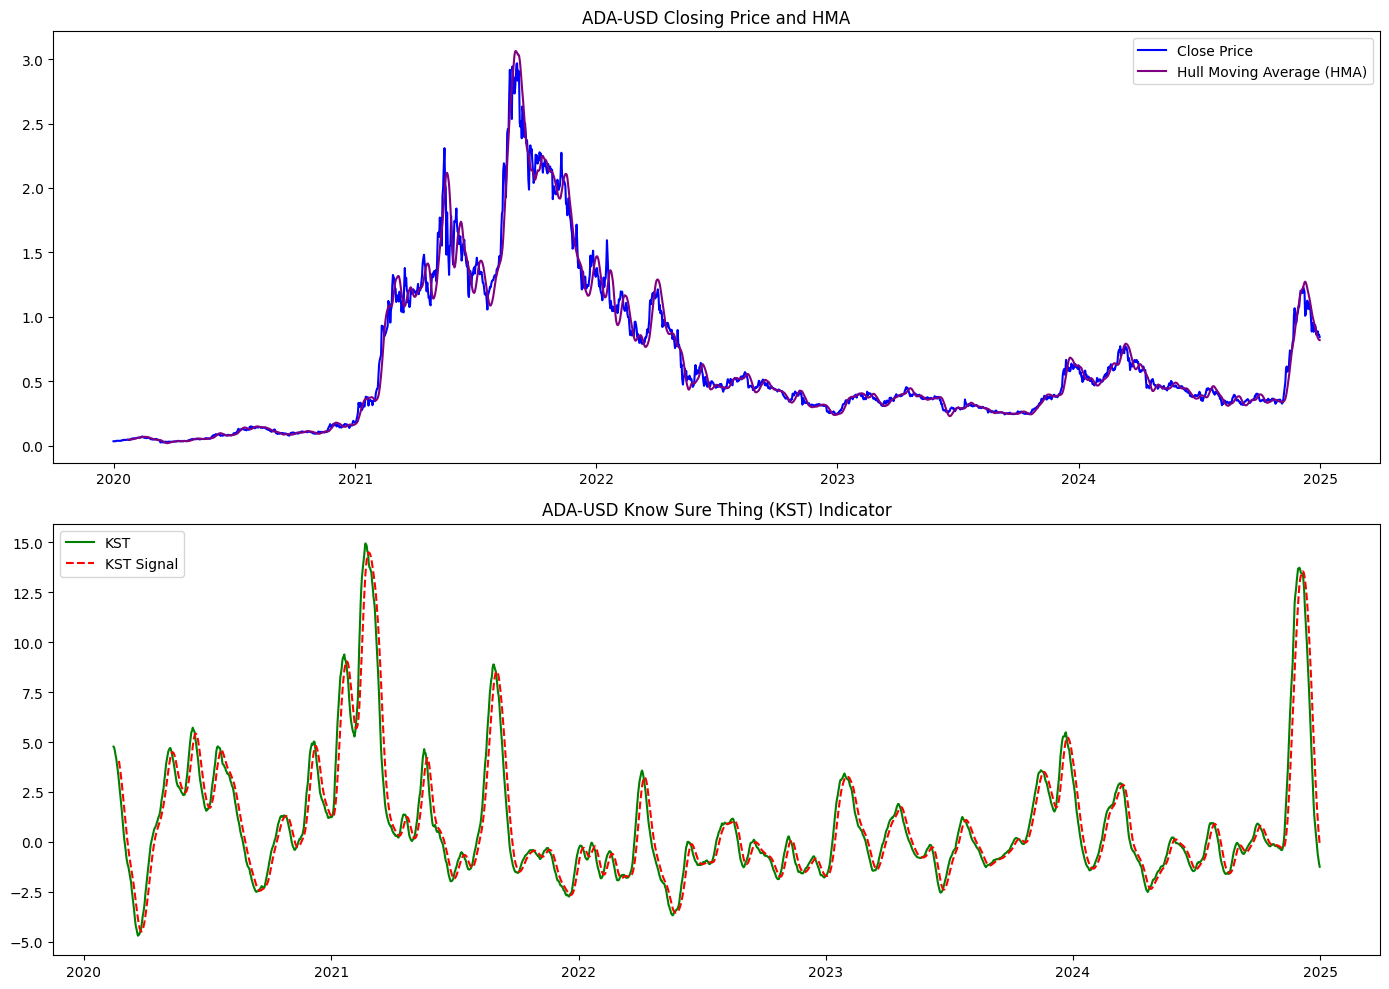

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Know Sure Thing (KST) indicator
def calculate_kst(df, r1=10, r2=15, r3=20, r4=30, sma1=10, sma2=10, sma3=10, sma4=15):
    roc1 = df['Close'].pct_change(r1)
    roc2 = df['Close'].pct_change(r2)
    roc3 = df['Close'].pct_change(r3)
    roc4 = df['Close'].pct_change(r4)

    smaroc1 = roc1.rolling(sma1).mean()
    smaroc2 = roc2.rolling(sma2).mean()
    smaroc3 = roc3.rolling(sma3).mean()
    smaroc4 = roc4.rolling(sma4).mean()

    kst = smaroc1 + (2 * smaroc2) + (3 * smaroc3) + (4 * smaroc4)
    kst_signal = kst.rolling(9).mean()

    return kst, kst_signal

# Function to calculate Hull Moving Average (HMA)
def calculate_hma(df, period=20):
    wma1 = df['Close'].rolling(period//2).mean()
    wma2 = df['Close'].rolling(period).mean()
    hma = ((2 * wma1) - wma2).rolling(int(np.sqrt(period))).mean()
    return hma

# Define the stock symbol and time period
symbol = 'ADA-USD'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate KST and KST Signal
kst, kst_signal = calculate_kst(df)

# Calculate HMA
hma = calculate_hma(df)

# Plotting the Close price with HMA on the same panel, and KST on another panel
plt.figure(figsize=(14, 10))

# Plot the stock's closing price and HMA on the same panel
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(hma, label='Hull Moving Average (HMA)', color='purple')
plt.title(f'{symbol} Closing Price and HMA')
plt.legend()

# Plot the KST and KST Signal
plt.subplot(2, 1, 2)
plt.plot(kst, label='KST', color='green')
plt.plot(kst_signal, label='KST Signal', color='red', linestyle='--')
plt.title(f'{symbol} Know Sure Thing (KST) Indicator')
plt.legend()

plt.tight_layout()
plt.show()
